In [1]:
# Load trees from .csv files in trees/ directory. Each file its called <model>.csv. I want to load all of them and
# create a NN to predict the model given the tree. The model is a string (name of the file) and the trees are stored as csv (CDV format)

import os
import numpy as np
from ete3 import Tree

class TreeEncoder:

    def encode_tree(self, tree_str):
        """
        Encode the tree structure into a format suitable for input into the neural network.
        """
        # Check if the tree is already encoded
        csv_file = tree_str[:-4] + '.csv'
        if os.path.exists(csv_file):
            return csv_file
        # Call the external script to get CDV encoding
        cmd = f"python -m CDV_full_tree -t {tree_str} -f {csv_file}" # > {tree_str[:-4]}.csv"
        os.system(cmd)
        

    def encode_all_trees(self, trees_directory):
        """
        Encode all the trees in the given directory.
        """
        tree_files = [os.path.join(trees_directory, file) for file in os.listdir(trees_directory) if file.endswith('.nwk')]
        for tree_file in tree_files:
            print(tree_file)
            self.encode_tree(tree_file)

In [9]:
import sys

trees_directory = "trees/"

encoder = TreeEncoder()
encoder.encode_all_trees(trees_directory)

trees/bd.nwk
trees/bisse.nwk
trees/bisseness.nwk
trees/classe.nwk
trees/classe_2.nwk
trees/geosse.nwk
trees/musse.nwk
trees/musse_90k.nwk
trees/quasse.nwk


In [11]:
import pandas as pd

trees = []
target = []

models = ["bd",
          "bisse",
          "bisseness",
          "classe_2",
          "geosse"
          #"musse",
          #"quasse"
          ]

for model_name in models:
    encoding = pd.read_csv(trees_directory + model_name + '.csv', sep='\t', header=None, skiprows=0, index_col=0)
    trees.append(encoding)
    target.append([model_name] * len(encoding))
    
assert len(trees) == len(target)

print("Number of trees per model:")
for model, tree in zip(models, trees):
    print(f"{model}: {len(tree)}")
    
# Concatenate all the trees and targets
trees = pd.concat(trees)
target = np.concatenate(target)

print("Number of trees in total:", len(trees))
print("Number of targets in total:", len(target))

trees

Number of trees per model:
bd: 268
bisse: 420
bisseness: 241
classe_2: 683
geosse: 68
Number of trees in total: 1680
Number of targets in total: 1680


,1,2,3,4,5,6,7,8,9,10,...,993,994,995,996,997,998,999,1000,1001,1002
0,,,,,,,,,,,,,,,,,,,,,
0,13.975176,13.041968,13.591479,13.794207,13.001776,13.213374,12.199373,13.930781,11.732213,11.134086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.599156
1,8.012841,6.149481,5.708792,6.178136,7.791805,4.613272,3.817847,7.059666,7.898457,7.967581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.770129
2,18.280376,15.809396,15.670503,17.693003,17.110394,16.115005,17.440034,15.827314,17.977755,15.295922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.591183
3,17.996226,17.783270,17.744065,17.712306,17.127398,16.715255,16.365283,17.615009,17.236252,16.256012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990354
4,5.910599,2.840898,4.631535,5.868371,4.553909,5.910599,0.000000,5.384971,4.906543,1.557961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,7.489382,4.045324,6.926766,7.320288,6.419889,7.428212,3.178314,6.567476,5.811917,6.575390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.360962
63,7.238689,5.652068,6.180483,6.923859,7.196220,5.657487,7.238689,4.913195,5.806563,6.089097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.086283
64,4.619219,3.115959,2.650620,2.269411,4.119396,4.421123,4.619219,0.742048,3.067237,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319923


In [13]:
target

array(['bd', 'bd', 'bd', ..., 'geosse', 'geosse', 'geosse'], dtype='<U9')

In [14]:
# Save the data
trees.to_csv("trees.csv")
np.save("target.npy", target)

In [15]:
# Load the data
trees = pd.read_csv("trees.csv", index_col=0)
target = np.load("target.npy")

C:\Users\matti\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trees, target, test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Train an advanced model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


             1          2          3          4          5          6  \
0                                                                       
163  10.624402   8.983895   8.801308   8.186272   9.759150   9.611447   
159  17.585418  17.026592  16.928403  16.704639  16.887739  15.900050   
32   21.845282  20.749075  20.150174  21.584768  19.501184  16.901445   
266  16.866070  16.543617  16.748045  16.426022  16.255063  16.010567   
148  10.490102   7.761458   9.799464   9.722173   9.970133  10.347099   
..         ...        ...        ...        ...        ...        ...   
201  13.709324  12.253334  12.245455  12.134786  12.192568  13.577649   
365  12.560083  11.973884  12.535541  11.955211  11.215265  12.350130   
172  15.205522  12.305225  14.715208  11.518305   9.778742  14.205535   
530  10.140809   9.576142   9.181598   8.663749   9.952228   7.697533   
197  11.860150  10.780495   9.896699  11.364397   9.003051   8.950932   

             7          8          9         10  .

In [18]:
#  Save the model
import pickle

with open("forest" + str(int((accuracy)*100)) + ".pkl", "wb") as f:
    pickle.dump(model, f)

In [19]:
# Create another NN model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5416666666666666


In [28]:
# Create a DNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, input_shape=(input_shape,), activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# build the model

# convert the target to integers
from sklearn.preprocessing import LabelEncoder
target_int = LabelEncoder().fit_transform(target)
print(target_int)
print(len(set(target_int)))

model = create_model(X_train.shape[1], len(set(target_int)))
model.summary()

Y_train = LabelEncoder().fit_transform(y_train)
# train the model and save the history
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

# save the model
model.save("dnn" + str(int((accuracy)*100)) + ".h5")

[0 0 0 ... 4 4 4]
5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 100)               100300    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 505       
Total params: 121,005
Trainable params: 121,005
Non-trainable params: 0
_________________________________________________________________
Train on 1075 samples, validate on 269 samples
Epoch 1/100
1075/1075 [==============================] - 0s 264us/sample - loss: 2.1566 - acc: 0.3005 - val_loss: 1.4580 - val_acc: 0.4498
Epoch 2/100
1075/1075 [==============================] - 0s 72

336/336 [==============================] - 0s 28us/sample - loss: 2.3397 - acc: 0.5446
Accuracy: 0.54464287


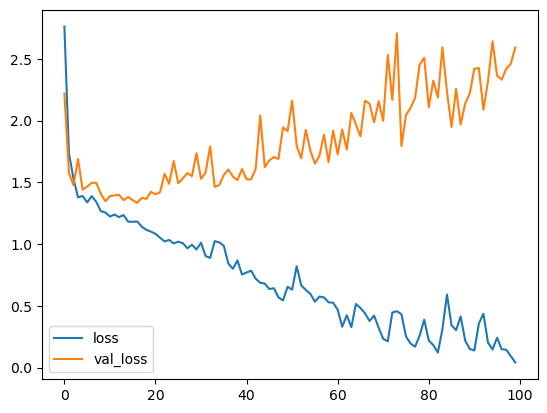

In [31]:
Y_test = LabelEncoder().fit_transform(y_test)
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)

# Plot the model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()